In [115]:
import os
import math
import re
import numpy as np
import pandas as pd
from omnetpp.scave import results, chart, utils
import matplotlib.pyplot as plt
from itertools import product, chain, combinations
import scipy
from IPython.display import display, HTML
%matplotlib inline

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

plotSize = (13, 10)

plt.style.use('seaborn-v0_8-whitegrid')


In [8]:
results.set_inputs(['../simulations/results/StandardBitcoin/*.sca'])

In [11]:
df = results.get_scalars('module =~ BitcoinNetwork AND name =~ blocks:count', include_attrs=True, include_fields=True).sort_values(['module', 'name'])
df[["module", "name", "value", "source", "title", "unit"]]

,module,name,value,source,title,unit
0,BitcoinNetwork,blocks:count,425.0,minedBlock,"Blocks, count",blocks
1,BitcoinNetwork,blocks:count,405.0,minedBlock,"Blocks, count",blocks
2,BitcoinNetwork,blocks:count,429.0,minedBlock,"Blocks, count",blocks
3,BitcoinNetwork,blocks:count,454.0,minedBlock,"Blocks, count",blocks
4,BitcoinNetwork,blocks:count,393.0,minedBlock,"Blocks, count",blocks
5,BitcoinNetwork,blocks:count,437.0,minedBlock,"Blocks, count",blocks
6,BitcoinNetwork,blocks:count,403.0,minedBlock,"Blocks, count",blocks
7,BitcoinNetwork,blocks:count,409.0,minedBlock,"Blocks, count",blocks
8,BitcoinNetwork,blocks:count,387.0,minedBlock,"Blocks, count",blocks
9,BitcoinNetwork,blocks:count,436.0,minedBlock,"Blocks, count",blocks


In [14]:
df['value'].mean()

425.56666666666666

In [181]:
df = results.get_scalars('module =~ BitcoinNetwork.miner[**].app[1] AND name =~ blocksMined:count', include_attrs=True, include_fields=True).sort_values(['module', 'name'])
df[["module", "name", "value", "source", "title", "unit"]]

,module,name,value,source,title,unit
0,BitcoinNetwork.miner[0].app[1],blocksMined:count,1.0,minedBlock,"Blocks Mined, count",blocks
10,BitcoinNetwork.miner[0].app[1],blocksMined:count,0.0,minedBlock,"Blocks Mined, count",blocks
20,BitcoinNetwork.miner[0].app[1],blocksMined:count,1.0,minedBlock,"Blocks Mined, count",blocks
30,BitcoinNetwork.miner[0].app[1],blocksMined:count,2.0,minedBlock,"Blocks Mined, count",blocks
40,BitcoinNetwork.miner[0].app[1],blocksMined:count,1.0,minedBlock,"Blocks Mined, count",blocks
50,BitcoinNetwork.miner[0].app[1],blocksMined:count,1.0,minedBlock,"Blocks Mined, count",blocks
60,BitcoinNetwork.miner[0].app[1],blocksMined:count,0.0,minedBlock,"Blocks Mined, count",blocks
70,BitcoinNetwork.miner[0].app[1],blocksMined:count,0.0,minedBlock,"Blocks Mined, count",blocks
80,BitcoinNetwork.miner[0].app[1],blocksMined:count,0.0,minedBlock,"Blocks Mined, count",blocks
90,BitcoinNetwork.miner[0].app[1],blocksMined:count,1.0,minedBlock,"Blocks Mined, count",blocks


In [29]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    v = np.var(a, ddof=1)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, v, m-h, m+h

(9.0, 9.5, 6.630805969849321, 11.369194030150679)

In [182]:
data = []
for i in range(0, 10):
    data.append((i,) + mean_confidence_interval(df[df['module'] == 'BitcoinNetwork.miner[' + str(i) + '].app[1]']['value']))

res = pd.DataFrame(data, columns=['id', 'mean', 'var', 'cimin', 'cimax'])
res

,id,mean,var,cimin,cimax
0,0,0.400000,0.317241,0.189682,0.610318
1,1,1.666667,1.264368,1.246793,2.086540
2,2,1.633333,1.826437,1.128691,2.137976
3,3,3.966667,2.102299,3.425254,4.508080
4,4,12.500000,17.568966,10.934855,14.065145
5,5,22.333333,17.885057,20.754172,23.912495
6,6,41.566667,35.357471,39.346314,43.787020
7,7,63.700000,68.424138,60.611226,66.788774
8,8,106.166667,105.522989,102.330875,110.002458
9,9,171.633333,141.343678,167.193981,176.072686


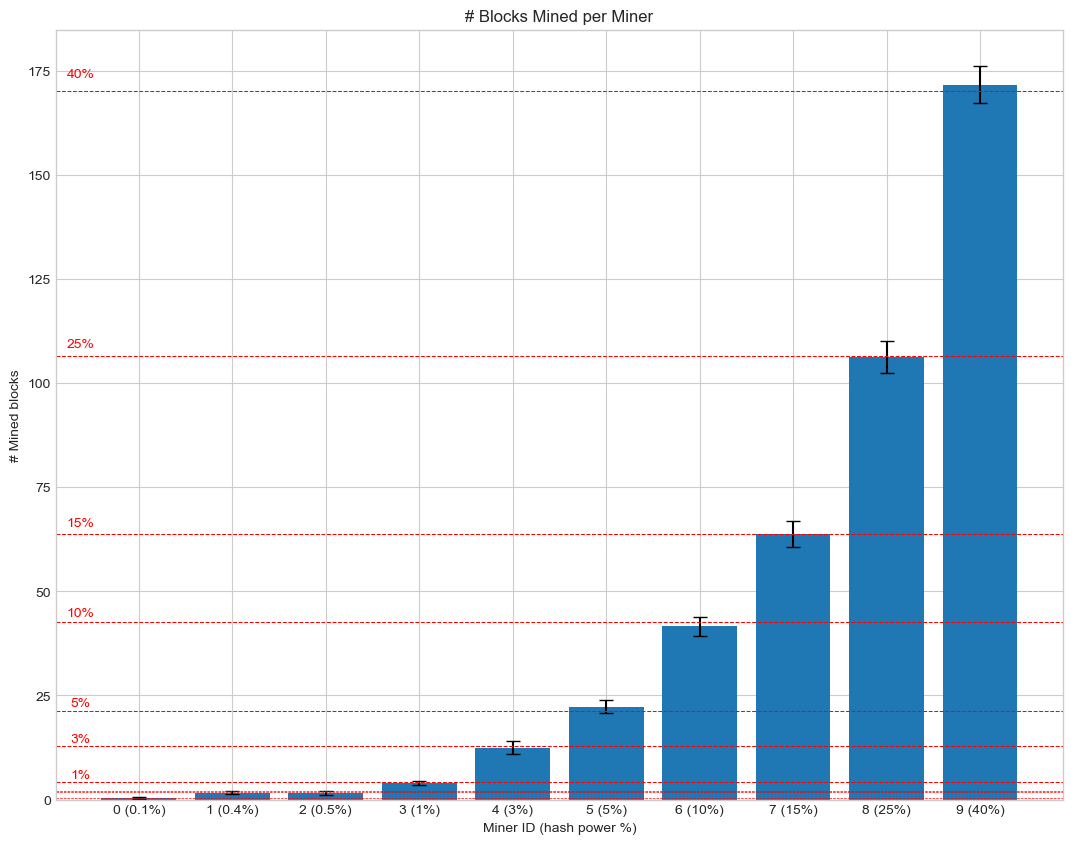

In [183]:
labels = ['0 (0.1%)', '1 (0.4%)', '2 (0.5%)', '3 (1%)', '4 (3%)', '5 (5%)', '6 (10%)', '7 (15%)', '8 (25%)', '9 (40%)']

means = list(res['mean'])

ci = res[['cimin', 'cimax']].to_numpy()

y_r = np.c_[means-ci[:,0],ci[:,1]-means ].T

plt.figure(figsize=plotSize)
plt.bar(res['id'], res['mean'], yerr=y_r, align='center', capsize=5)
plt.xticks(res['id'], labels)

expectedmean = 432
totalmean = 425.56666666666666
plt.axhline(y = 0.001 * totalmean, color = 'r', linestyle = 'dashed', linewidth=0.5, label = "0.1%")
plt.axhline(y = 0.004 * totalmean, color = 'r', linestyle = 'dashed', linewidth=0.5, label = "0.4%")
plt.axhline(y = 0.005 * totalmean, color = 'r', linestyle = 'dashed', linewidth=0.5, label = "0.5%")
plt.axhline(y = 0.01 * totalmean, color = 'r', linestyle = 'dashed', linewidth=0.75, label = "1%")
plt.text(0.025, 0.01 * expectedmean, '1%', color='r', va='bottom', ha='center', transform=plt.gca().get_yaxis_transform())
plt.axhline(y = 0.03 * totalmean, color = 'r', linestyle = 'dashed', linewidth=0.75, label = "3%")
plt.text(0.025, 0.03 * expectedmean, '3%', color='r', va='bottom', ha='center', transform=plt.gca().get_yaxis_transform())
plt.axhline(y = 0.05 * totalmean, color = 'r', linestyle = 'dashed', linewidth=0.75, label = "5%")
plt.text(0.025, 0.05 * expectedmean, '5%', color='r', va='bottom', ha='center', transform=plt.gca().get_yaxis_transform())
plt.axhline(y = 0.1 * totalmean, color = 'r', linestyle = 'dashed', linewidth=0.75, label = "10%")
plt.text(0.025, 0.1 * expectedmean, '10%', color='r', va='bottom', ha='center', transform=plt.gca().get_yaxis_transform())
plt.axhline(y = 0.15 * totalmean, color = 'r', linestyle = 'dashed', linewidth=0.75, label = "15%")
plt.text(0.025, 0.15 * expectedmean, '15%', color='r', va='bottom', ha='center', transform=plt.gca().get_yaxis_transform())
plt.axhline(y = 0.25 * totalmean, color = 'r', linestyle = 'dashed', linewidth=0.75, label = "25%")
plt.text(0.025, 0.25 * expectedmean, '25%', color='r', va='bottom', ha='center', transform=plt.gca().get_yaxis_transform())
plt.axhline(y = 0.4 * totalmean, color = 'r', linestyle = 'dashed', linewidth=0.75, label = "40%")
plt.text(0.025, 0.4 * expectedmean, '40%', color='r', va='bottom', ha='center', transform=plt.gca().get_yaxis_transform())
plt.xlabel('Miner ID (hash power %)')
plt.ylabel('# Mined blocks')
plt.title('# Blocks Mined per Miner')
plt.savefig('figures/standard-blocks-mined-per-miner.eps', format='eps')
plt.show()

In [130]:
df = results.get_scalars('module =~ BitcoinNetwork.miner[**].app[0] AND name =~ miningEarnings:last', include_attrs=True, include_fields=True).sort_values(['module', 'name'])
df[["module", "name", "value", "source", "title", "unit"]]

,module,name,value,source,title,unit
0,BitcoinNetwork.miner[0].app[0],miningEarnings:last,1.000258e+10,sum(miningEarn),"Mining earnings, last",sat
10,BitcoinNetwork.miner[0].app[0],miningEarnings:last,0.000000e+00,sum(miningEarn),"Mining earnings, last",sat
20,BitcoinNetwork.miner[0].app[0],miningEarnings:last,5.002211e+09,sum(miningEarn),"Mining earnings, last",sat
30,BitcoinNetwork.miner[0].app[0],miningEarnings:last,1.500380e+10,sum(miningEarn),"Mining earnings, last",sat
40,BitcoinNetwork.miner[0].app[0],miningEarnings:last,1.000233e+10,sum(miningEarn),"Mining earnings, last",sat
50,BitcoinNetwork.miner[0].app[0],miningEarnings:last,1.000260e+10,sum(miningEarn),"Mining earnings, last",sat
60,BitcoinNetwork.miner[0].app[0],miningEarnings:last,5.000000e+09,sum(miningEarn),"Mining earnings, last",sat
70,BitcoinNetwork.miner[0].app[0],miningEarnings:last,5.000000e+09,sum(miningEarn),"Mining earnings, last",sat
80,BitcoinNetwork.miner[0].app[0],miningEarnings:last,5.000000e+09,sum(miningEarn),"Mining earnings, last",sat
90,BitcoinNetwork.miner[0].app[0],miningEarnings:last,1.000190e+10,sum(miningEarn),"Mining earnings, last",sat


In [131]:
data = []
for i in range(0, 10):
    data.append((i,) + mean_confidence_interval(df[df['module'] == 'BitcoinNetwork.miner[' + str(i) + '].app[0]']['value']))

res = pd.DataFrame(data, columns=['id', 'mean', 'var', 'cimin', 'cimax'])
res

,id,mean,var,cimin,cimax
0,0,5.000911e+09,1.552465e+19,3.529641e+09,6.472181e+09
1,1,1.100352e+10,3.692305e+19,8.734541e+09,1.327250e+10
2,2,1.100360e+10,4.382965e+19,8.531500e+09,1.347569e+10
3,3,2.234199e+10,6.682992e+19,1.928941e+10,2.539457e+10
4,4,6.436009e+10,4.292009e+20,5.662417e+10,7.209600e+10
5,5,1.138808e+11,4.429244e+20,1.060222e+11,1.217394e+11
6,6,2.092551e+11,9.129844e+20,1.979724e+11,2.205378e+11
7,7,3.193008e+11,1.768793e+21,3.035964e+11,3.350051e+11
8,8,5.298912e+11,2.510485e+21,5.111818e+11,5.486006e+11
9,9,8.568632e+11,3.685756e+21,8.341936e+11,8.795329e+11


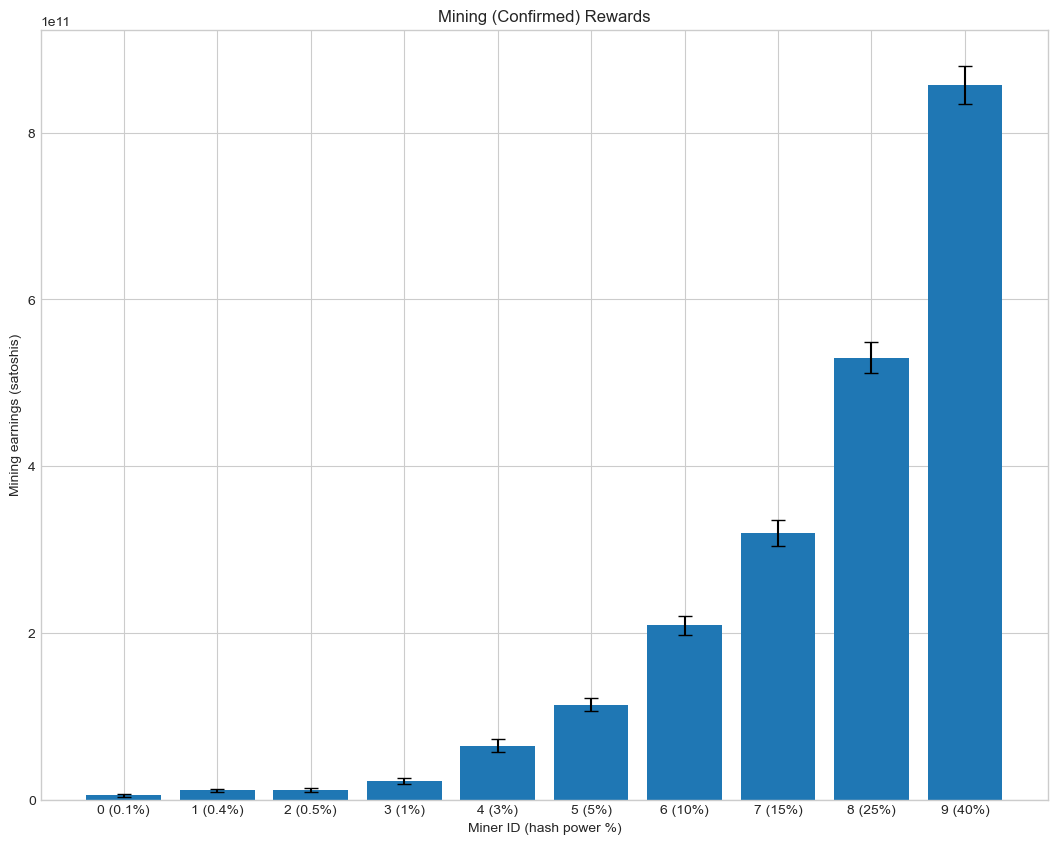

In [105]:
labels = ['0 (0.1%)', '1 (0.4%)', '2 (0.5%)', '3 (1%)', '4 (3%)', '5 (5%)', '6 (10%)', '7 (15%)', '8 (25%)', '9 (40%)']

means = list(res['mean'])

ci = res[['cimin', 'cimax']].to_numpy()

y_r = np.c_[means-ci[:,0],ci[:,1]-means ].T

plt.figure(figsize=plotSize)
plt.bar(res['id'], res['mean'], yerr=y_r, align='center', capsize=5)
plt.xticks(res['id'], labels)

plt.xlabel('Miner ID (hash power %)')
plt.ylabel('Mining earnings (satoshis)')
plt.title('Mining (Confirmed) Rewards')
#plt.savefig('figures/standard-mining-rewards.eps', format='eps')
plt.show()

In [163]:
df = results.get_scalars('module =~ BitcoinNetwork.** AND name =~ transactionFee:sum', include_attrs=True, include_fields=True).sort_values(['module', 'name'])
df[["module", "name", "value", "source", "title", "unit"]]

,module,name,value,source,title,unit
52,BitcoinNetwork.miner[0].app[2],transactionFee:sum,43878210.0,txFee,"Transaction Fee, sum",sat
114,BitcoinNetwork.miner[0].app[2],transactionFee:sum,41612848.0,txFee,"Transaction Fee, sum",sat
176,BitcoinNetwork.miner[0].app[2],transactionFee:sum,42432792.0,txFee,"Transaction Fee, sum",sat
238,BitcoinNetwork.miner[0].app[2],transactionFee:sum,41368430.0,txFee,"Transaction Fee, sum",sat
300,BitcoinNetwork.miner[0].app[2],transactionFee:sum,43668179.0,txFee,"Transaction Fee, sum",sat
362,BitcoinNetwork.miner[0].app[2],transactionFee:sum,41077022.0,txFee,"Transaction Fee, sum",sat
424,BitcoinNetwork.miner[0].app[2],transactionFee:sum,44085939.0,txFee,"Transaction Fee, sum",sat
486,BitcoinNetwork.miner[0].app[2],transactionFee:sum,41884662.0,txFee,"Transaction Fee, sum",sat
548,BitcoinNetwork.miner[0].app[2],transactionFee:sum,45514184.0,txFee,"Transaction Fee, sum",sat
610,BitcoinNetwork.miner[0].app[2],transactionFee:sum,41284646.0,txFee,"Transaction Fee, sum",sat


In [164]:
data = []
modules = df['module'].unique()
for i in modules:
    type = 'u'
    if 'miner' in i:
        type = 'm'
    match = re.search('BitcoinNetwork\.(miner|node)\[(.*)\]\.app.*', i, re.IGNORECASE)
    intid = int(match.group(2))
    if intid < 10:
        id = type + '0' + str(intid)
    else:
        id = type + str(intid)
    data.append((id,) + mean_confidence_interval(df[df['module'] == i]['value']))

res = pd.DataFrame(data, columns=['id', 'mean', 'var', 'cimin', 'cimax']).sort_values(['id'])
res

,id,mean,var,cimin,cimax
0,m00,4.266647e+07,7.963277e+12,4.161274e+07,4.372019e+07
1,m01,4.351339e+07,5.550705e+12,4.263364e+07,4.439313e+07
2,m02,4.262527e+07,3.978979e+12,4.188042e+07,4.337012e+07
3,m03,4.271506e+07,3.624691e+12,4.200415e+07,4.342598e+07
4,m04,4.349712e+07,5.328693e+12,4.263515e+07,4.435909e+07
5,m05,4.247703e+07,3.614797e+12,4.176709e+07,4.318698e+07
6,m06,4.279892e+07,7.718367e+12,4.176152e+07,4.383631e+07
7,m07,4.316359e+07,5.976665e+12,4.225072e+07,4.407647e+07
8,m08,4.218526e+07,3.985379e+12,4.143981e+07,4.293071e+07
9,m09,4.210885e+07,4.519412e+12,4.131503e+07,4.290267e+07


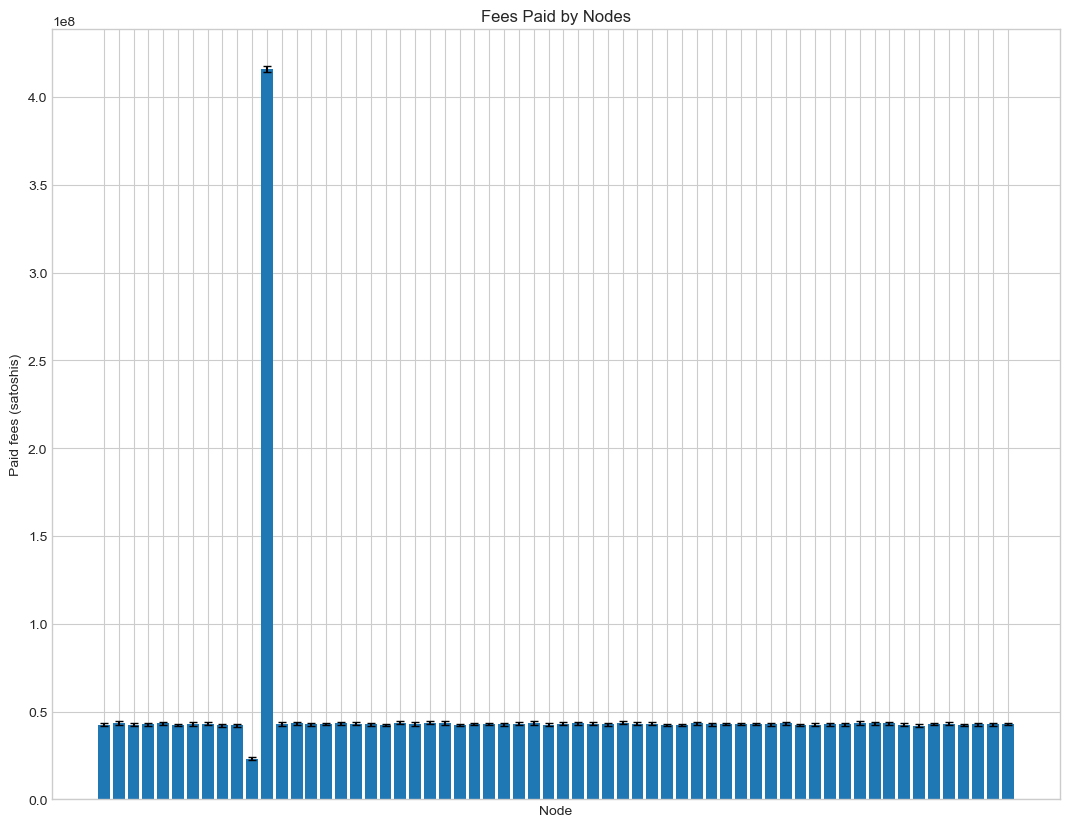

In [166]:
means = list(res['mean'])

ci = res[['cimin', 'cimax']].to_numpy()

y_r = np.c_[means-ci[:,0],ci[:,1]-means ].T

plt.figure(figsize=plotSize)
plt.bar(res['id'], res['mean'], yerr=y_r, align='center', capsize=3)
plt.tick_params(
    axis='x',
    which='both',
    bottom=False,
    top=False,
    labelbottom=False)

plt.xlabel('Node')
plt.ylabel('Paid fees (satoshis)')
plt.title('Fees Paid by Nodes')
#means = list(res['mean'])

ci = res[['cimin', 'cimax']].to_numpy()

y_r = np.c_[meanplt.savefig('figures/standard-fees-paid.eps', format='eps')
plt.show()

In [167]:
df = results.get_scalars('module =~ BitcoinNetwork.** AND name =~ walletBalance:last', include_attrs=True, include_fields=True).sort_values(['module', 'name'])
df[["module", "name", "value", "source", "title", "unit"]]

,module,name,value,source,title,unit
52,BitcoinNetwork.miner[0].app[0],walletBalance:last,1.294890e+11,sum(addUTXO)-sum(removeUTXO),"Wallet balance, last",sat
114,BitcoinNetwork.miner[0].app[0],walletBalance:last,5.920017e+10,sum(addUTXO)-sum(removeUTXO),"Wallet balance, last",sat
176,BitcoinNetwork.miner[0].app[0],walletBalance:last,8.516764e+10,sum(addUTXO)-sum(removeUTXO),"Wallet balance, last",sat
238,BitcoinNetwork.miner[0].app[0],walletBalance:last,1.286511e+11,sum(addUTXO)-sum(removeUTXO),"Wallet balance, last",sat
300,BitcoinNetwork.miner[0].app[0],walletBalance:last,7.008978e+10,sum(addUTXO)-sum(removeUTXO),"Wallet balance, last",sat
362,BitcoinNetwork.miner[0].app[0],walletBalance:last,7.104513e+10,sum(addUTXO)-sum(removeUTXO),"Wallet balance, last",sat
424,BitcoinNetwork.miner[0].app[0],walletBalance:last,6.542873e+10,sum(addUTXO)-sum(removeUTXO),"Wallet balance, last",sat
486,BitcoinNetwork.miner[0].app[0],walletBalance:last,8.446014e+10,sum(addUTXO)-sum(removeUTXO),"Wallet balance, last",sat
548,BitcoinNetwork.miner[0].app[0],walletBalance:last,8.441460e+10,sum(addUTXO)-sum(removeUTXO),"Wallet balance, last",sat
610,BitcoinNetwork.miner[0].app[0],walletBalance:last,7.492572e+10,sum(addUTXO)-sum(removeUTXO),"Wallet balance, last",sat


In [168]:
data = []
for i in range(0, 10):
    data.append((i,) + mean_confidence_interval(df[df['module'] == 'BitcoinNetwork.miner[' + str(i) + '].app[0]']['value']))

res = pd.DataFrame(data, columns=['id', 'mean', 'var', 'cimin', 'cimax'])
res

,id,mean,var,cimin,cimax
0,0,8.748642e+10,2.777552e+20,8.126324e+10,9.370960e+10
1,1,8.783501e+10,2.580410e+20,8.183675e+10,9.383328e+10
2,2,8.665576e+10,1.898156e+20,8.151121e+10,9.180031e+10
3,3,1.025287e+11,3.388743e+20,9.565484e+10,1.094026e+11
4,4,1.491633e+11,8.501321e+20,1.382759e+11,1.600508e+11
5,5,1.910629e+11,5.947924e+20,1.819562e+11,2.001697e+11
6,6,2.935709e+11,1.526609e+21,2.789813e+11,3.081606e+11
7,7,4.021920e+11,1.683194e+21,3.868723e+11,4.175116e+11
8,8,6.118080e+11,2.831938e+21,5.919368e+11,6.316792e+11
9,9,9.404371e+11,4.296189e+21,9.159621e+11,9.649121e+11


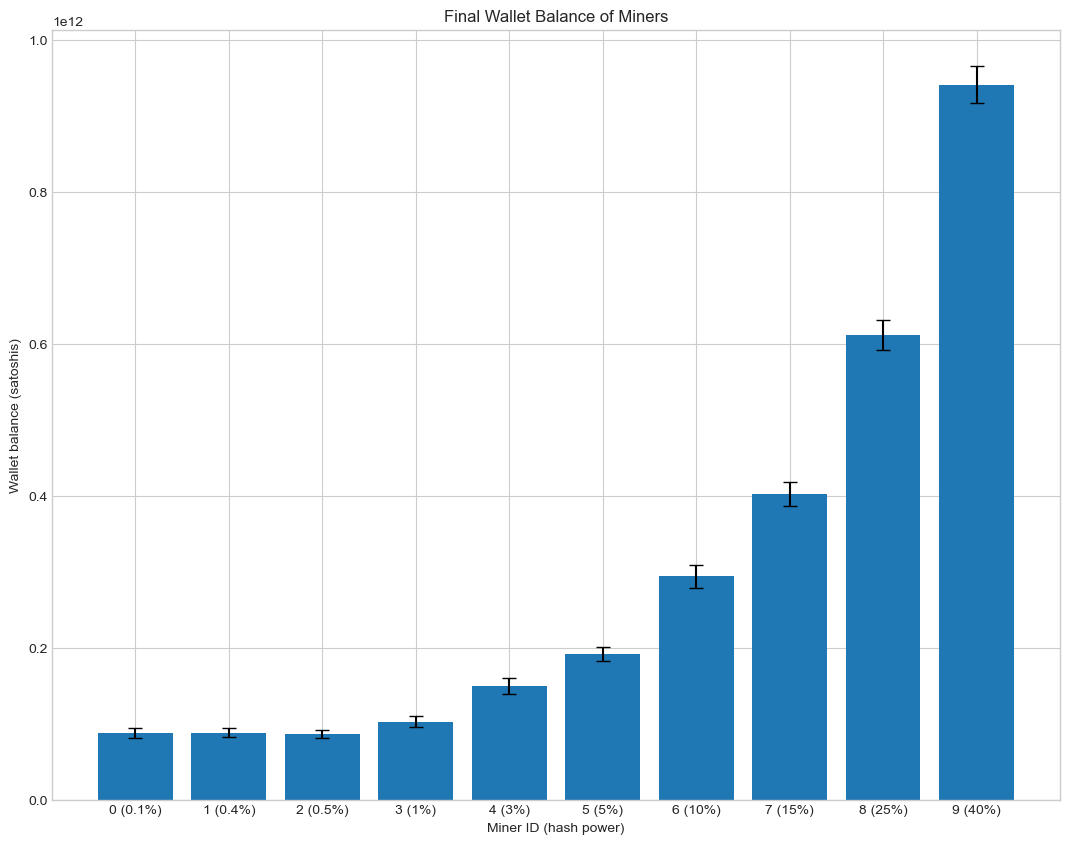

In [169]:
labels = ['0 (0.1%)', '1 (0.4%)', '2 (0.5%)', '3 (1%)', '4 (3%)', '5 (5%)', '6 (10%)', '7 (15%)', '8 (25%)', '9 (40%)']

means = list(res['mean'])

ci = res[['cimin', 'cimax']].to_numpy()

y_r = np.c_[means-ci[:,0],ci[:,1]-means ].T

plt.figure(figsize=plotSize)
plt.bar(res['id'], res['mean'], yerr=y_r, align='center', capsize=5)
plt.xticks(res['id'], labels)

plt.xlabel('Miner ID (hash power)')
plt.ylabel('Wallet balance (satoshis)')
plt.title('Final Wallet Balance of Miners')
#plt.savefig('figures/standard-final-balance.eps', format='eps')
plt.show()

In [184]:
df = results.get_scalars('module =~ BitcoinNetwork.** AND name =~ createdTransactions:last', include_attrs=True, include_fields=True).sort_values(['module', 'name'])
df[["module", "name", "value", "source", "title", "unit"]]

,module,name,value,source,title,unit
52,BitcoinNetwork.miner[0].app[2],createdTransactions:last,12970.0,count(txSize),"Created Transactions, last",txs
114,BitcoinNetwork.miner[0].app[2],createdTransactions:last,13028.0,count(txSize),"Created Transactions, last",txs
176,BitcoinNetwork.miner[0].app[2],createdTransactions:last,12953.0,count(txSize),"Created Transactions, last",txs
238,BitcoinNetwork.miner[0].app[2],createdTransactions:last,13020.0,count(txSize),"Created Transactions, last",txs
300,BitcoinNetwork.miner[0].app[2],createdTransactions:last,13076.0,count(txSize),"Created Transactions, last",txs
362,BitcoinNetwork.miner[0].app[2],createdTransactions:last,13024.0,count(txSize),"Created Transactions, last",txs
424,BitcoinNetwork.miner[0].app[2],createdTransactions:last,12975.0,count(txSize),"Created Transactions, last",txs
486,BitcoinNetwork.miner[0].app[2],createdTransactions:last,13050.0,count(txSize),"Created Transactions, last",txs
548,BitcoinNetwork.miner[0].app[2],createdTransactions:last,12945.0,count(txSize),"Created Transactions, last",txs
610,BitcoinNetwork.miner[0].app[2],createdTransactions:last,12997.0,count(txSize),"Created Transactions, last",txs


In [185]:
data = []
modules = df['module'].unique()
for i in modules:
    type = 'u'
    if 'miner' in i:
        type = 'm'
    match = re.search('BitcoinNetwork\.(miner|node)\[(.*)\]\.app.*', i, re.IGNORECASE)
    intid = int(match.group(2))
    if intid < 10:
        id = type + '0' + str(intid)
    else:
        id = type + str(intid)
    data.append((id,) + mean_confidence_interval(df[df['module'] == i]['value']))

res = pd.DataFrame(data, columns=['id', 'mean', 'var', 'cimin', 'cimax']).sort_values(['id'])
res

,id,mean,var,cimin,cimax
0,m00,12966.866667,12517.705747,12925.089035,13008.644299
1,m01,12962.666667,17430.988506,12913.367173,13011.966160
2,m02,12945.933333,11651.167816,12905.627660,12986.239007
3,m03,12977.733333,9832.754023,12940.706290,13014.760377
4,m04,12936.066667,13654.202299,12892.433713,12979.699621
5,m05,12998.033333,14540.102299,12953.007145,13043.059522
6,m06,13005.100000,8792.713793,12970.085904,13040.114096
7,m07,12975.433333,8680.529885,12940.643322,13010.223345
8,m08,12976.466667,14881.636782,12930.914735,13022.018599
9,m09,12942.566667,19438.185057,12890.506050,12994.627283


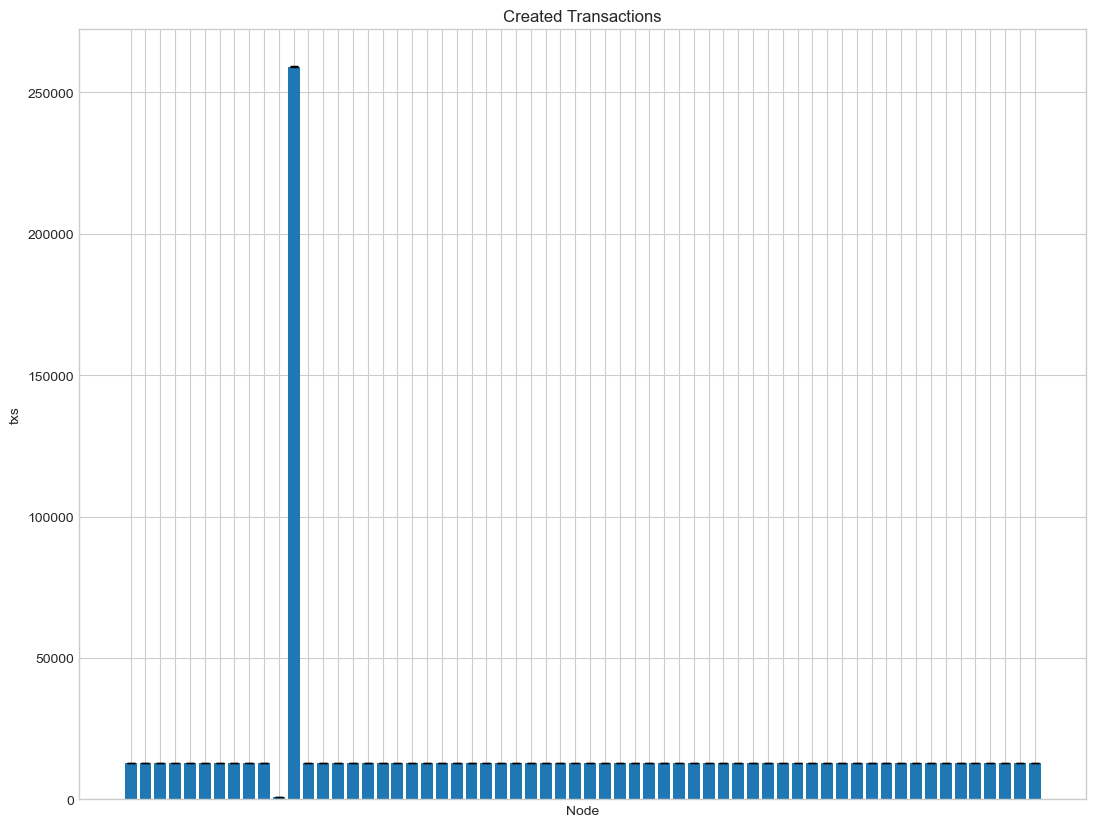

In [186]:
means = list(res['mean'])

ci = res[['cimin', 'cimax']].to_numpy()

y_r = np.c_[means-ci[:,0],ci[:,1]-means ].T

plt.figure(figsize=plotSize)
plt.bar(res['id'], res['mean'], yerr=y_r, align='center', capsize=3)
plt.tick_params(
    axis='x',
    which='both',
    bottom=False,
    top=False,
    labelbottom=False)

plt.xlabel('Node')
plt.ylabel('txs')
plt.title('Created Transactions')
#plt.savefig('figures/standard-created-transactions.eps', format='eps')
plt.show()

In [187]:
res[(res['id'] != 'u00') & (res['id'] != 'u01')]['mean'].mean()

12963.100555555555

In [188]:
res['mean'].sum()

1037706.1333333334